# CÁLCULO DEL ÁNGULO DE POLARIZACIÓN

Las librerías que se utilizarán en este código son:

In [2]:
%matplotlib inline  

import healpy as hp 
import matplotlib.pyplot as plt 
import numpy as np

La dirección de la polarización lineal se obtiene a partir de las intensidades en dos ejes ortogonales (Stokes Q y U) mediante

$$ 
\psi = \frac{1}{2}\arctan\Bigl(\frac{U}{Q}\Bigr)
$$

Esto es lo que se conoce como ángulo de polarización, que describe la orientación del campo eléctrico en el plano del cielo. A este se le añade un término sumando de $\frac{\pi}{2}$ para limitarlo a $[0,π]$, evitando ambigüedades de 180° y garantizando una representación única de cada dirección de polarización.

In [5]:
def difpsi(Q, U):
    psi = 0.5 * np.arctan2(U, Q) + np.pi/2
    return psi

A continuación, se crea un bucle para el cálculo de la función en cada una de las frecuencias estudiadas.

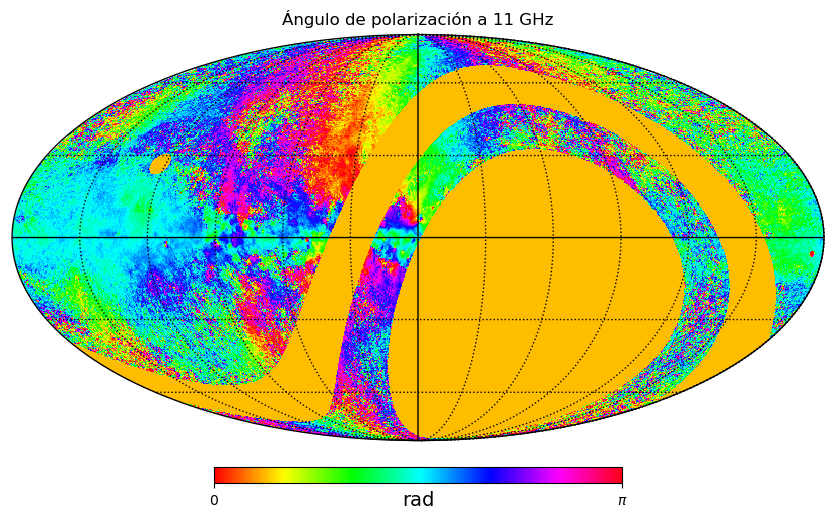

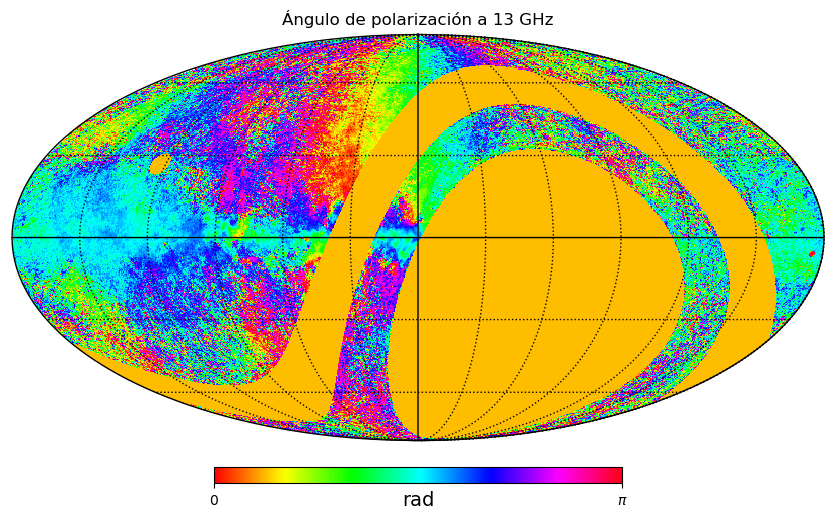

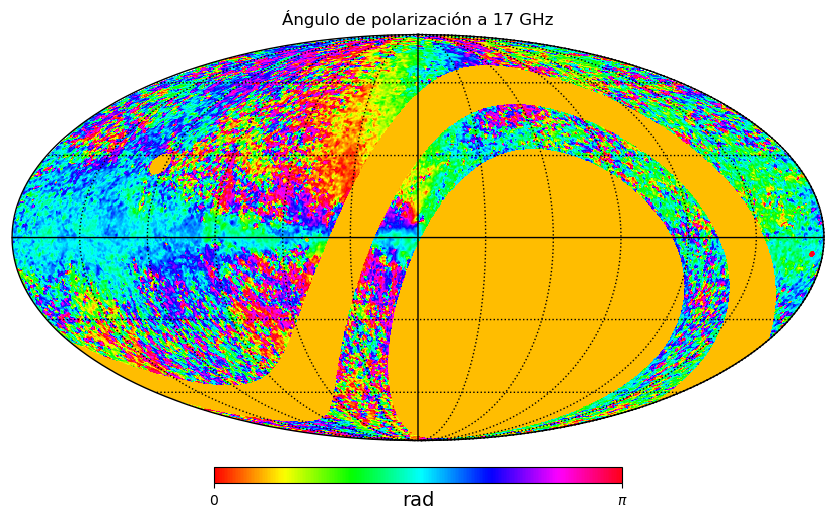

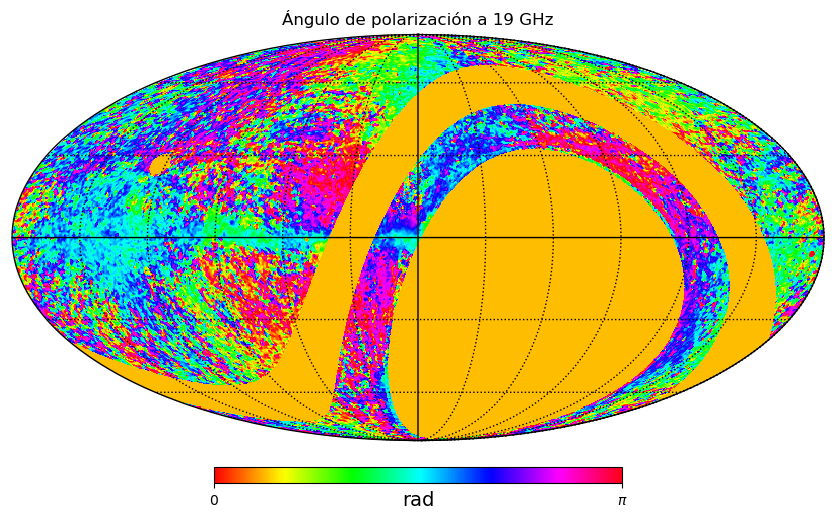

In [13]:

frecuencias = [11, 13, 17, 19]

for freq in frecuencias:
    
    archivo = f"quijote_mfi_smth_skymap_{freq}ghz_512_dr1.fits"
    
    # Lectura de los mapas Q y U

    mapQ = hp.read_map(archivo, field=1)
    mapU = hp.read_map(archivo, field=2)

    # Cálculo del ángulo de polarización

    psi = difpsi(mapQ, mapU)

    # Visualización de los mapas del ángulo de polarización

    hp.mollview(psi,
                title=f"Ángulo de polarización a {freq} GHz",
                unit="rad",
                cmap="hsv",
                min= 0, max= np.pi)  
    hp.graticule()

    # Cambiar los ticks de la barra de color
    fig = plt.gcf()
    cb = fig.axes[-1]  # healpy mollview pone la colorbar en el último eje
    cb.set_xticks([0, np.pi])
    cb.set_xticklabels([r"$0$", r"$\pi$"])


    plt.show()
